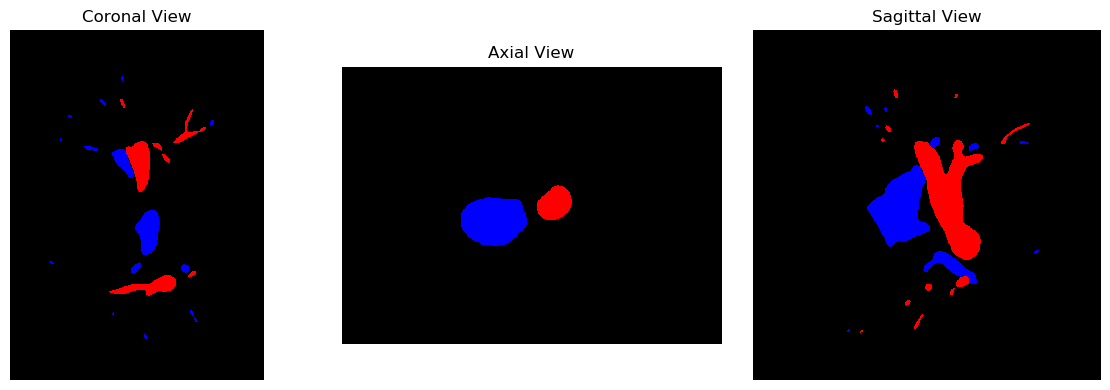

In [3]:
# [FUNCTIONAL - USE] Generates image of central coronal, axial, and sagittal views of labelmap (not segmentations) for label verification

# STRUCTURES SHOULD BE AS FOLLOWS:

# Label 0 - black (background)
# Label 1 - blue (artery)
# Label 2 - red (vein)

import numpy as np
import nrrd
import matplotlib.pyplot as plt

# Loads the '.nrrd' file
file_path = 'C:/Users/Adam/Desktop/Programs/code_testing/python_file_rename_copy/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps/88-Jensen/S-Final-2-label.nrrd'
data, header = nrrd.read(file_path)

# Selects the middle slices from the dataset
coronal_slice_index = data.shape[2] // 2
axial_slice_index = data.shape[0] // 2
sagittal_slice_index = data.shape[1] // 2

coronal_slice = data[:, :, coronal_slice_index]
axial_slice = data[axial_slice_index, :, :]
sagittal_slice = data[:, sagittal_slice_index, :]

# Creates colored slices 
def create_colored_slice(slice_data):
    # Set segmentation values of 1 to blue, values of 2 to red, and values of 0 to black
    colored_slice = np.zeros(slice_data.shape + (3,), dtype=np.uint8)
    colored_slice[slice_data == 1] = [0, 0, 255]  # Blue
    colored_slice[slice_data == 2] = [255, 0, 0]  # Red
    return colored_slice

colored_coronal_slice = create_colored_slice(coronal_slice)
colored_axial_slice = create_colored_slice(axial_slice)
colored_sagittal_slice = create_colored_slice(sagittal_slice)

# Displays the slices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(colored_coronal_slice)
plt.title('Coronal View')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(colored_axial_slice)
plt.title('Axial View')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(colored_sagittal_slice)
plt.title('Sagittal View')
plt.axis('off')

plt.tight_layout()
plt.show()


Segment0_Color: 
Segment1_Color: 


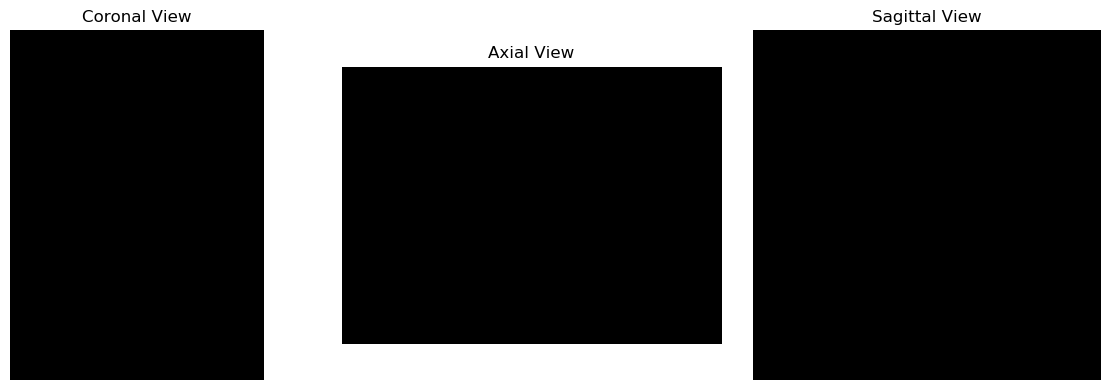

In [2]:
# (WIP - trying to make code that produces colormap output regardless of how many segmentation labels are within file header) 

import numpy as np
import nrrd
import matplotlib.pyplot as plt

# Load the .nrrd file
file_path = 'C:/Users/Adam/Desktop/Programs/code_testing/python_file_rename_copy/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps/88-Jensen/S-Final-2-label.nrrd'
data, header = nrrd.read(file_path)

# Select the middle slices
coronal_slice_index = data.shape[2] // 2
axial_slice_index = data.shape[0] // 2
sagittal_slice_index = data.shape[1] // 2

coronal_slice = data[:, :, coronal_slice_index]
axial_slice = data[axial_slice_index, :, :]
sagittal_slice = data[:, sagittal_slice_index, :]

# Define color mappings based on header values
color_mapping = {
    ('Segment0_Color', '0.000000 0.592157 0.807843'): (0, 0, 255),  # Blue
    ('Segment0_Color', '0.847059 0.396078 0.309804'): (255, 0, 0),  # Red
    ('Segment1_Color', '0.847059 0.396078 0.309804'): (255, 0, 0),  # Red
    ('Segment1_Color', '0.000000 0.592157 0.807843'): (0, 0, 255)   # Blue
}

# Get the colors from the header
red_color = np.array([0.847059, 0.396078, 0.309804])
blue_color = np.array([0, 0.592157, 0.807843])

# Create colored slices
def create_colored_slice(slice_data, header_key, header_value):
    # Set the specified color to the segmentation volume with the specified header value
    colored_slice = np.zeros(slice_data.shape + (3,), dtype=np.uint8)
    color = color_mapping.get((header_key, header_value), (0, 0, 0))  # Default to black if no color found
    colored_slice[slice_data == 1] = color
    return colored_slice

# Get header values based on the actual header keys in your .nrrd file
header_value_coronal = header.get('Segment0_Color', '')
header_value_axial = header.get('Segment1_Color', '')
header_value_sagittal = header.get('Segment0_Color', '')

# Print the header values associated with 'Segment0_Color' and 'Segment1_Color'
print("Segment0_Color:", header_value_coronal)
print("Segment1_Color:", header_value_axial)

colored_coronal_slice = create_colored_slice(coronal_slice, 'Segment0_Color', header_value_coronal)
colored_axial_slice = create_colored_slice(axial_slice, 'Segment1_Color', header_value_axial)
colored_sagittal_slice = create_colored_slice(sagittal_slice, 'Segment0_Color', header_value_sagittal)

# Display the slices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(colored_coronal_slice)
plt.title('Coronal View')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(colored_axial_slice)
plt.title('Axial View')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(colored_sagittal_slice)
plt.title('Sagittal View')
plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt

# Load the .nrrd file
file_path = 'C:/Users/Adam/Desktop/Programs/code_testing/python_file_rename_copy/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps/88-Jensen/S-Final-2-label.nrrd'
data, header = nrrd.read(file_path)

# Select the middle slices
coronal_slice_index = data.shape[2] // 2
axial_slice_index = data.shape[0] // 2
sagittal_slice_index = data.shape[1] // 2

coronal_slice = data[:, :, coronal_slice_index]
axial_slice = data[axial_slice_index, :, :]
sagittal_slice = data[:, sagittal_slice_index, :]

# Define color mappings based on header values
color_mapping = {
    ('Segment0_Color', '0.000000 0.592157 0.807843'): (0, 0, 255),  # Blue
    ('Segment0_Color', '0.847059 0.396078 0.309804'): (255, 0, 0),  # Red
    ('Segment1_Color', '0.847059 0.396078 0.309804'): (255, 0, 0),  # Red
    ('Segment1_Color', '0.000000 0.592157 0.807843'): (0, 0, 255)   # Blue
}

# # Get header values based on the actual header keys in your .nrrd file
# header_value_coronal = header.get('Segment0_Color', '')
# header_value_axial = header.get('Segment1_Color', '')
# header_value_sagittal = header.get('Segment0_Color', '')

# Creates colored slices 
def create_colored_slice(slice_data):
    # Set segmentation values of 1 to blue, values of 2 to red, and values of 0 to black
    colored_slice = np.zeros(slice_data.shape + (3,), dtype=np.uint8)
    colored_slice[slice_data == 1] = [0, 0, 255]  # Blue
    colored_slice[slice_data == 2] = [255, 0, 0]  # Red
    return colored_slice



colored_coronal_slice = create_colored_slice(coronal_slice, 'Segment0_Color', header_value_coronal)
colored_axial_slice = create_colored_slice(axial_slice, 'Segment1_Color', header_value_axial)
colored_sagittal_slice = create_colored_slice(sagittal_slice, 'Segment0_Color', header_value_sagittal)

# Print the header values associated with 'Segment0_Color' and 'Segment1_Color'
print("Segment0_Color:", header_value_coronal)
print("Segment1_Color:", header_value_axial)

# Display the slices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(colored_coronal_slice)
plt.title('Coronal View')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(colored_axial_slice)
plt.title('Axial View')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(colored_sagittal_slice)
plt.title('Sagittal View')
plt.axis('off')

plt.tight_layout()
plt.show()


TypeError: create_colored_slice() takes 1 positional argument but 3 were given

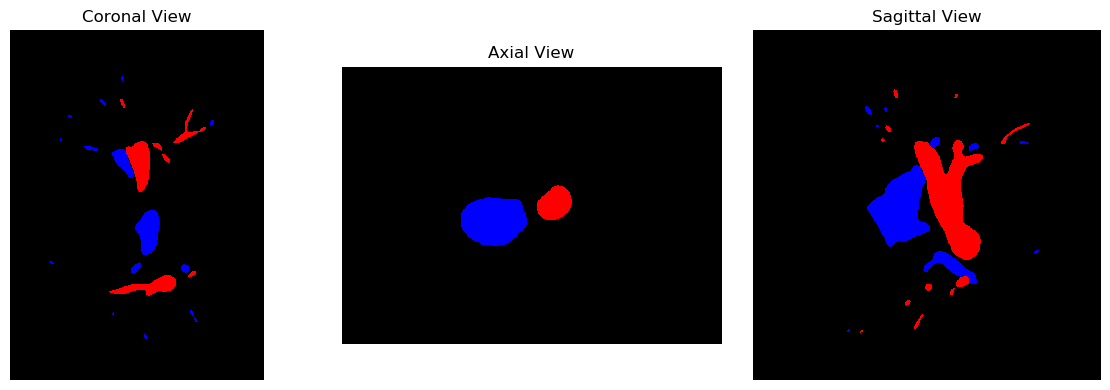

In [10]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt

# Load the .nrrd file
file_path = 'C:/Users/Adam/Desktop/Programs/code_testing/python_file_rename_copy/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps/88-Jensen/S-Final-2-label.nrrd'
data, header = nrrd.read(file_path)

# Select the middle slices
coronal_slice_index = data.shape[2] // 2
axial_slice_index = data.shape[0] // 2
sagittal_slice_index = data.shape[1] // 2

coronal_slice = data[:, :, coronal_slice_index]
axial_slice = data[axial_slice_index, :, :]
sagittal_slice = data[:, sagittal_slice_index, :]

# Define colors for segmentation values
colors = {
    0: (0, 0, 0),     # Black
    1: (0, 0, 255), # Blue
    2: (255, 0, 0),   # Red
}

# Apply colors to slices
def colorize_slice(slice_data):
    colored_slice = np.zeros(slice_data.shape + (3,), dtype=np.uint8)
    for value, color in colors.items():
        colored_slice[slice_data == value] = color
    return colored_slice

colored_coronal_slice = colorize_slice(coronal_slice)
colored_axial_slice = colorize_slice(axial_slice)
colored_sagittal_slice = colorize_slice(sagittal_slice)

# Display the slices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(colored_coronal_slice)
plt.title('Coronal View')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(colored_axial_slice)
plt.title('Axial View')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(colored_sagittal_slice)
plt.title('Sagittal View')
plt.axis('off')

plt.tight_layout()
plt.show()


C:\Users\Adam\AppData\Local\Temp\ipykernel_8176\360807072.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  colored_slice[np.all(slice_data == color_value, axis=-1)] = color


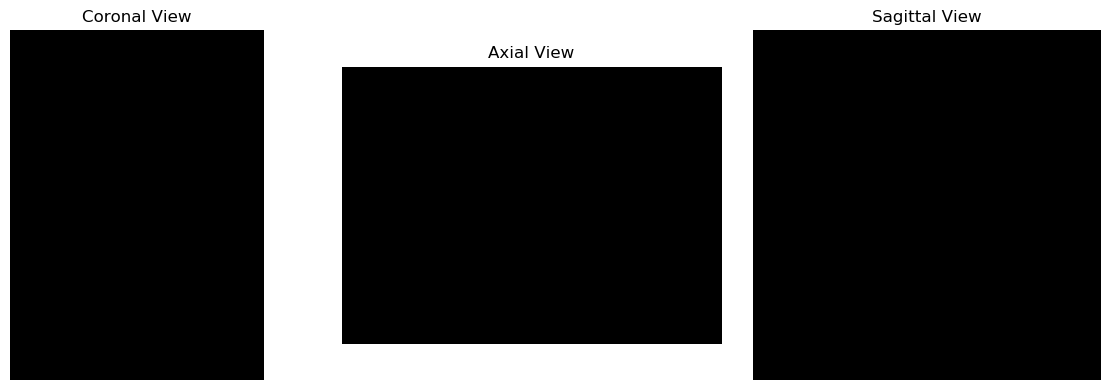

In [60]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt

# Load the .nrrd file
file_path = 'C:/Users/Adam/Desktop/Programs/code_testing/python_file_rename_copy/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps/88-Jensen/S-Segmentation-1.nrrd'
data, header = nrrd.read(file_path)

# Select the middle slices
coronal_slice_index = data.shape[2] // 2
axial_slice_index = data.shape[0] // 2
sagittal_slice_index = data.shape[1] // 2

coronal_slice = data[:, :, coronal_slice_index]
axial_slice = data[axial_slice_index, :, :]
sagittal_slice = data[:, sagittal_slice_index, :]

# Get the color values from the header
segment0_color = tuple(map(float, header.get('Segment0_Color', '0 0 0').split()))
segment1_color = tuple(map(float, header.get('Segment1_Color', '0 0 0').split()))

# Define colors for segmentation values based on header values
color_mapping = {
    segment0_color: (0, 0, 255),  # Blue
    segment1_color: (255, 0, 0)    # Red
}

# Apply colors to slices
def colorize_slice(slice_data):
    colored_slice = np.zeros(slice_data.shape + (3,), dtype=np.uint8)
    for color_value, color in color_mapping.items():
        colored_slice[np.all(slice_data == color_value, axis=-1)] = color
    return colored_slice

colored_coronal_slice = colorize_slice(coronal_slice)
colored_axial_slice = colorize_slice(axial_slice)
colored_sagittal_slice = colorize_slice(sagittal_slice)

# Display the slices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(colored_coronal_slice)
plt.title('Coronal View')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(colored_axial_slice)
plt.title('Axial View')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(colored_sagittal_slice)
plt.title('Sagittal View')
plt.axis('off')

plt.tight_layout()
plt.show()


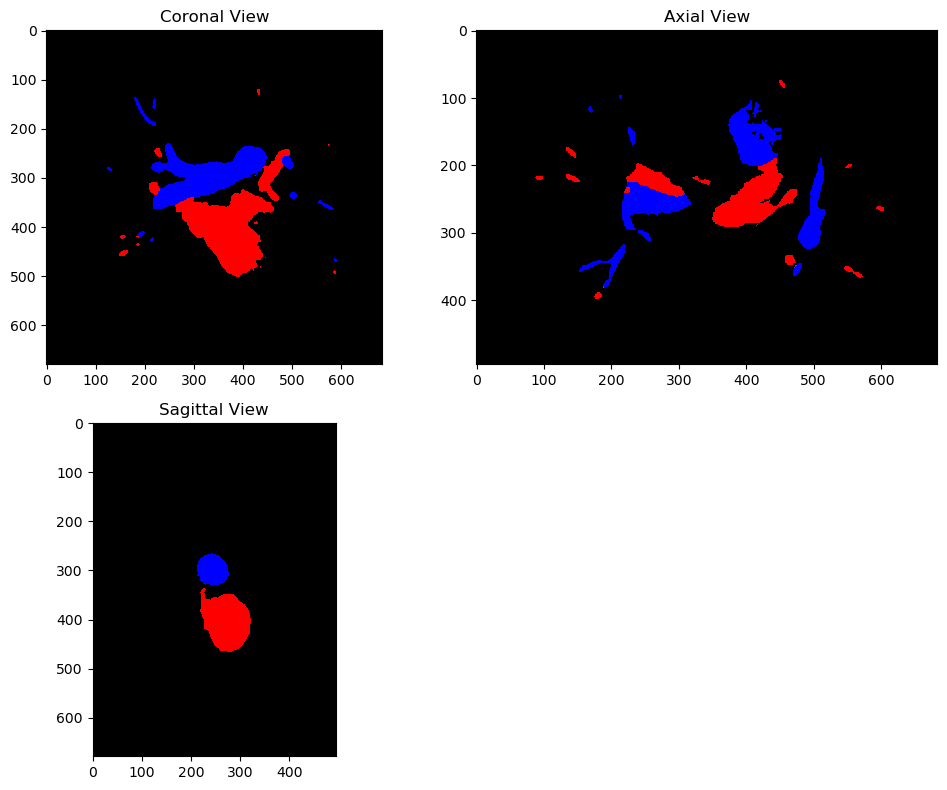

C:\Users\Adam\AppData\Local\Temp\ipykernel_14268\982291761.py:89: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if   value == '0.847059 0.396078 0.309804':
C:\Users\Adam\AppData\Local\Temp\ipykernel_14268\982291761.py:91: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == '0 0.592157 0.807843':


In [11]:
# [USE THIS - FUNCTIONAL]

import numpy as np
import nrrd
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Load the .nrrd file
file_path = 'C:/Users/Adam/Desktop/Programs/code_testing/python_file_rename_copy/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps/88-Jensen/S-Segmentation-1.nrrd'
out_file = 'C:/Users/Adam/Desktop/Programs/code_testing/python_file_rename_copy/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps/88-Jensen/S-Segmentation-1_outputTest.nrrd'
data, header = nrrd.read(file_path)

#####################################################

# THIS SECTION IS USED TO GENERATE PLOTS OF THE CENTRAL AXIAL, CORONAL & SAGITTAL VIEWS OF THE INPUT FILE

# Calculate center indices for the three views
x_center = data.shape[0] // 2
y_center = data.shape[1] // 2
z_center = data.shape[2] // 2

# Rotates images to help match appearance in 3D Slicer
coronal_slice = np.rot90(data[:, y_center, :])
axial_slice = np.rot90(data[:, :, z_center])
sagittal_slice = np.rot90(data[x_center, :, :])

# Rotate the axial slice 180 degrees left to right to help match how it appears in 3D Slicer
axial_slice = np.flip(axial_slice, axis=0)

# Defines colors for segmentation values
colors = {
    0: (0, 0, 0),     # Black
    2: (0, 0, 255), # Blue
    1: (255, 0, 0),   # Red
}

# Applys colors to slices
def colorize_slice(slice_data):
    colored_slice = np.zeros(slice_data.shape + (3,), dtype=np.uint8)
    for value, color in colors.items():
        colored_slice[slice_data == value] = color
    return colored_slice

# Displays the slices
colored_coronal_slice = colorize_slice(coronal_slice)
colored_axial_slice = colorize_slice(axial_slice)
colored_sagittal_slice = colorize_slice(sagittal_slice)

# Creates a 2x2 subplot for the three views
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(colored_coronal_slice, cmap='gray')
plt.title('Coronal View')

plt.subplot(2, 2, 2)
plt.imshow(colored_axial_slice, cmap='gray')
plt.title('Axial View')

plt.subplot(2, 2, 3)
plt.imshow(colored_sagittal_slice, cmap='gray')
plt.title('Sagittal View')

plt.tight_layout()
plt.show()

#######################################################

# Outputs header key/value list
for key, value in header.items():
    try:
        if   value == '0.847059 0.396078 0.309804': 
            VValue = header[key[0:-6] + '_LabelValue']
        elif value == '0 0.592157 0.807843': 
            AValue = header[key[0:-6] + '_LabelValue']
    except NameError:
        print("Expected segmentation volumes not found.")

# Creates new 3D numpy dataset, replaces values of 0 with 1 & 2 where they are present in the input file 
outputlabelmap = np.zeros_like(data)
outputlabelmap[np.equal(data, int(AValue))] = 1
outputlabelmap[np.equal(data, int(VValue))] = 2

# Saves segmentation to labelmap nrrd file
nrrd.write(out_file, outputlabelmap, header)
